## Calculo de mu combinando Monojet y Dijet

In [1]:
import pyhf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pyhf.contrib.viz import brazil

In [2]:
#Lectura de datos
VBF = pd.read_csv("../mu_for_VBF/VBFData.csv")
MJ = pd.read_csv("../mu_for_monojet/MJData.csv")
DJ = pd.read_csv("../mu_for_Dijet/DJData.csv")

In [3]:
bkg = np.concatenate((VBF["VBF_bkg"], DJ["DJ_bkg"], MJ["MJ_bkg"]), axis=None)
errbkg = np.concatenate((VBF["VBF_errbkg"], DJ["DJ_errbkg"], MJ["MJ_errbkg"]), axis=None)
Data = np.concatenate((VBF["VBF_data"], DJ["DJ_data"], MJ["MJ_data"]), axis=None)
sl = np.concatenate((VBF["VBF_ldecays"], DJ["DJ_signal"], MJ["MJ_axial"]), axis=None)
WZ = np.concatenate((VBF["VBF_WZdecays"], DJ["DJ_signal"], MJ["MJ_axial"]), axis=None)

In [4]:
model1 = pyhf.simplemodels.uncorrelated_background(signal = list(sl), bkg = list(bkg), bkg_uncertainty = list(errbkg))
model2 = pyhf.simplemodels.uncorrelated_background(signal = list(WZ), bkg = list(bkg), bkg_uncertainty = list(errbkg))

In [5]:
observations1 = np.concatenate((Data, model1.config.auxdata)) #Observaciones modelo 1 - Señal sl (VBF) / Señal axial (MJ)
observations2 = np.concatenate((Data, model2.config.auxdata)) #Observaciones modelo 2 - Señal WZ (VBF) / Señal axial (MJ)


In [9]:
#Calculamos el mu observado y esperado
poi_values = np.linspace(0.01, 2, 100)

observations1 = np.concatenate((Data, model1.config.auxdata)) #Observaciones modelo 1 - Señal sl (VBF) / Señal axial (MJ)

#Limites - sl
obs_limit1, exp_limits1, (scan1, results1) = pyhf.infer.intervals.upper_limits.upper_limit(
    observations1, model1, poi_values, level=0.05, return_results=True
)

print("Señal sl (VBF) / Señal axial (MJ)")
print(f"Upper limit (obs): μ = {obs_limit1:.4f}")
print(f"Upper limit (exp): μ = {exp_limits1[2]:.4f}")

Señal sl (VBF) / Señal axial (MJ)
Upper limit (obs): μ = 0.2357
Upper limit (exp): μ = 0.2366


In [10]:
poi_values = np.linspace(0.01, 2, 100)
observations2 = np.concatenate((Data, model2.config.auxdata)) #Observaciones modelo 2 - Señal WZ (VBF) / Señal axial (MJ)

#Limites - WZ
obs_limit2, exp_limits2, (scan2, results2) = pyhf.infer.intervals.upper_limits.upper_limit(
    observations2, model2, poi_values, level=0.05, return_results=True
)

print("Señal WZ (VBF) / Señal axial (MJ)")
print(f"Upper limit (obs): μ = {obs_limit2:.4f}")
print(f"Upper limit (exp): μ = {exp_limits2[2]:.4f}")

Señal WZ (VBF) / Señal axial (MJ)
Upper limit (obs): μ = 0.2386
Upper limit (exp): μ = 0.2364


In [12]:
#Calculo del p-value
CLs_obs1, tails1 ,CLs_exp_band1 = pyhf.infer.hypotest(
    0.2366, observations1, model1, return_expected_set=True, return_tail_probs = True
)

print("Señal sl (VBF) / Señal axial (MJ)")
print(f"  CLs (obs): Cls = {CLs_obs1:.4f}")
print(f"  CLs (exp): CLs (0σ) = {CLs_exp_band1[2]:.4f}")

CLs_obs2, tails2, CLs_exp_band2 = pyhf.infer.hypotest(
    0.2364, observations2, model2, return_expected_set=True, return_tail_probs = True
)

print("Señal WZ (VBF) / Señal axial (MJ)")
print(f"  CLs (obs): Cls = {CLs_obs2:.4f}")
print(f"  CLs (exp): CLs (0σ) = {CLs_exp_band2[2]:.4f}")

Señal sl (VBF) / Señal axial (MJ)
  CLs (obs): Cls = 0.0486
  CLs (exp): CLs (0σ) = 0.0494
Señal WZ (VBF) / Señal axial (MJ)
  CLs (obs): Cls = 0.0514
  CLs (exp): CLs (0σ) = 0.0495


In [16]:
pvalueM1 = pyhf.infer.hypotest(
    1.0, observations1, model1, return_expected_set=True, return_tail_probs = True
)[1][0]

pvalueM2 = pyhf.infer.hypotest(
    1.0, observations2, model2, return_expected_set=True, return_tail_probs = True
)[1][0]

print(f"  p-value (sl) = {pvalueM1}")
print(f"  p-value (WZ) = {pvalueM2}")


  p-value (sl) = 2.1381217011527101e-16
  p-value (WZ) = 2.735577673476437e-16


In [21]:
pValSpace = np.linspace(0,1, 50)
pVals = np.ones_like(pValSpace)
for i in range(len(pValSpace)):
    pVals[i] =  pyhf.infer.hypotest(
    pValSpace[i], observations1, model1, return_expected_set=True, return_tail_probs = True
    )[1][0]

Text(0, 0.5, '$p-value$')

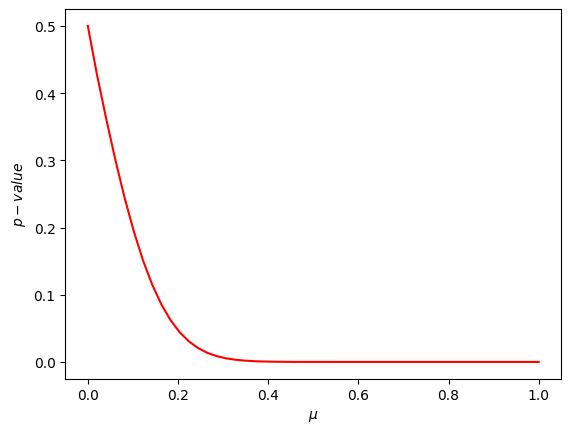

In [22]:
plt.plot(pValSpace, pVals, 'r-')
plt.xlabel("$\mu$")
plt.ylabel("$p-value$")

In [18]:
pyhf.infer.hypotest(
    0.2386, observations2, model2, return_expected_set=True, return_tail_probs = True
)


(array(0.04925158),
 [array(0.02511244), array(0.50988097)],
 [array(0.00149678),
  array(0.00900101),
  array(0.04738819),
  array(0.19355853),
  array(0.5186553)])

p-value debe ser pequeño para cl_s+b